In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score

In [3]:
'''
Load CSV
'''
df = pd.read_csv('training_data.csv', encoding="latin1")

In [4]:
'''
Inspect dataset
'''
df.columns

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

In [5]:
print(df.isna().sum())

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64


In [6]:
import ipywidgets
from ydata_profiling import ProfileReport

In [ ]:
# Clear 

df = df.drop("city_name", axis = 1)
df = df.drop("AVERAGE_PRECIPITATION", axis = 1)
df = df.drop("AVERAGE_RAIN", axis = 1)



In [8]:
df_withoutna = df.dropna(subset=["AVERAGE_SPEED_DIFF"])

df_withoutna["AVERAGE_CLOUDINESS"] = df_withoutna["AVERAGE_CLOUDINESS"].replace({
    "c�u claro": "ceu claro",
    "nuvens quebrados": "nuvens quebradas",

})

df["AVERAGE_CLOUDINESS"] = df["AVERAGE_CLOUDINESS"].str.replace("c�u", "ceu")



/var/folders/pb/ddc867k96bqg0zm8fb7p0mfw0000gn/T/ipykernel_55714/872844428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_withoutna["AVERAGE_CLOUDINESS"] = df_withoutna["AVERAGE_CLOUDINESS"].replace({


In [9]:
#df_withoutna = df_withoutna.drop("AVERAGE_CLOUDINESS", axis = 1)


profile = ProfileReport(df_withoutna, title = "Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 217.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

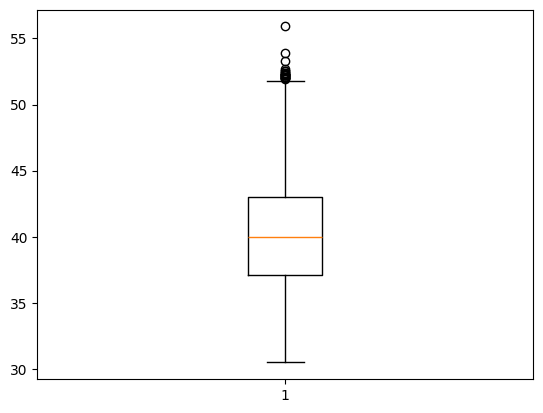

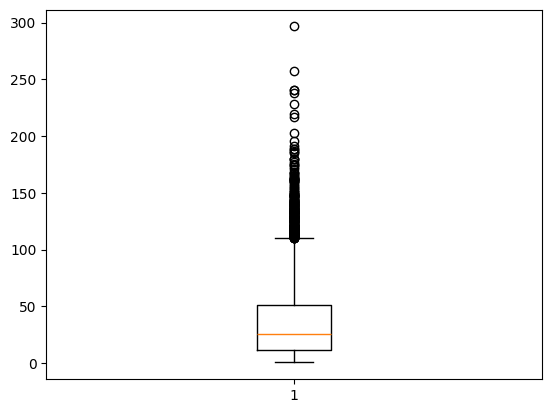

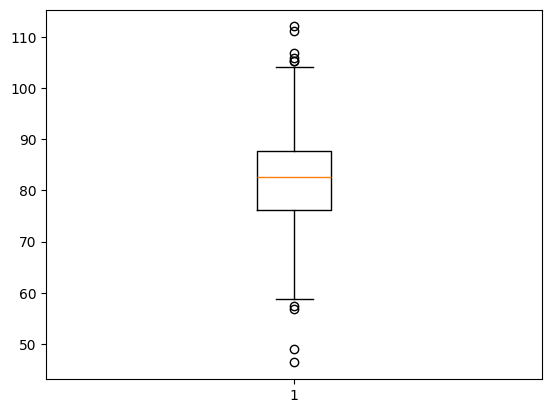

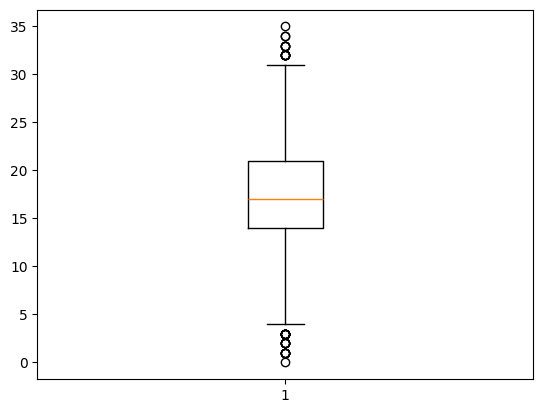

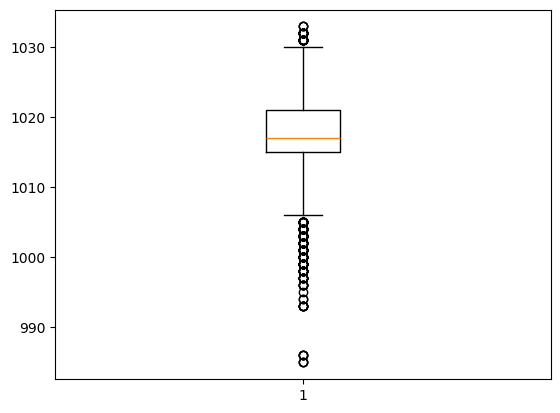

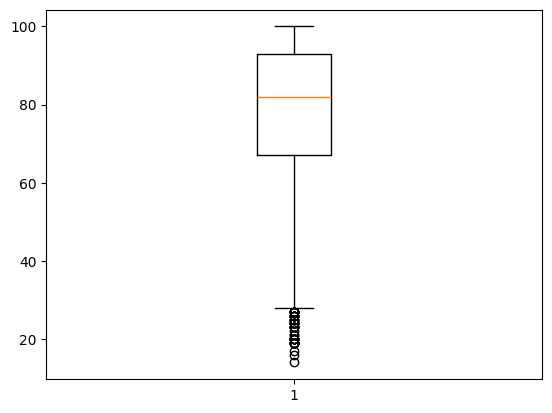

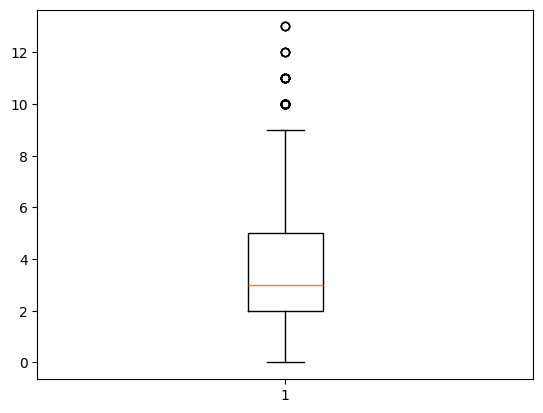

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot(df_withoutna["AVERAGE_FREE_FLOW_SPEED"])
plt.show()

plt.boxplot(df_withoutna["AVERAGE_TIME_DIFF"])
plt.show()

plt.boxplot(df_withoutna["AVERAGE_FREE_FLOW_TIME"])
plt.show()

plt.boxplot(df_withoutna["AVERAGE_TEMPERATURE"])
plt.show()

plt.boxplot(df_withoutna["AVERAGE_ATMOSP_PRESSURE"])
plt.show()

plt.boxplot(df_withoutna["AVERAGE_HUMIDITY"])
plt.show()

plt.boxplot(df_withoutna["AVERAGE_WIND_SPEED"])
plt.show()
